In [450]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [474]:
from acquire import get_titanic_data
from prepare import prep_titanic_data

df = prep_titanic_data(get_titanic_data())

In [475]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [554]:
df.fare.value_counts(bins=5, sort=False)

(-0.513, 102.466]     666
(102.466, 204.932]     30
(204.932, 307.398]     15
(307.398, 409.863]      0
(409.863, 512.329]      3
Name: fare, dtype: int64

In [477]:
df = df.dropna()

In [478]:
train, test = train_test_split(
    df, test_size=.30, random_state=123, stratify=df.survived)

In [512]:
scaler = MinMaxScaler()

scaler.fit(train[['age', 'fare']])

train[['age', 'fare']] = scaler.transform(train[['age', 'fare']])
test[['age', 'fare']] = scaler.transform(test[['age', 'fare']])

In [513]:
train[['age', 'fare']].head(10)

,age,fare
555,0.773813,0.051822
398,0.283740,0.020495
622,0.246042,0.030726
873,0.585323,0.017567
157,0.371701,0.015713
371,0.220910,0.012679
787,0.095250,0.056848
604,0.434531,0.051822
360,0.497361,0.054457
498,0.308872,0.295806


## Logistic Regression (_titanic data_)

4. Look in the scikit-learn documentation to research the solver parameter. What is your best option(s) for the particular problem you are trying to solve and the data to be used?
    - _newton-cg_ is the best solver to use because this is a small data set, whereas ‘sag’ and ‘saga’ are faster for large data sets
    - it gave the best logit.sore with 73% of the predictions correct


5. Run through steps 2-4 using another solver (from question 5)

1. Fit the logistic regression classifier to your training sample and transform, i.e. make predictions on the training sample

In [532]:
logit = LogisticRegression(random_state = 123, solver='lbfgs')

7. Save the best model in logit_fit

In [533]:
logit.fit(train[['pclass','age','fare','sibsp','parch']], train.survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [540]:
logit.predict(train[['pclass','age','fare','sibsp','parch']])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,

2. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

6. Which performs better on your in-sample data?

In [535]:
train['prediction'] = logit.predict(train[['pclass','age','fare','sibsp','parch']])

In [536]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(train[['pclass','age','fare','sibsp','parch']], train.survived)))

Accuracy of Logistic Regression classifier on training set: 0.71


### Create a confusion matrix
- True Positive: number of occurrences where y is true and y is predicted true; [0,0]
- True Negative: number of occurrences where y is false and y is predicted false; [1,1]
- False Positive: number of occurrences where y is false and y is predicted true; [0,1]
- False Negative: number of occurrences where y is true and y is predicted false; [1,0]

In [537]:
confusion_matrix(train.survived, train.prediction)

array([[248,  48],
       [ 95, 108]])

### Create a classificaiton report
- Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)
- Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)
- f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.
- Support: number of occurrences of each class in where y is true.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [538]:
cm = pd.DataFrame(confusion_matrix(train.survived, train.prediction),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

cm

,Pred -,Pred +
Actual -,248,48
Actual +,95,108


Text(0.5, 1.0, 'Confusion Matrix')

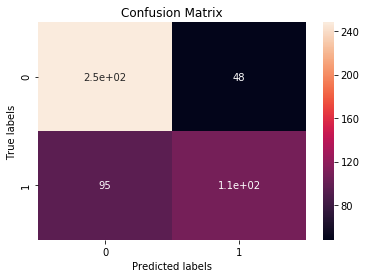

In [539]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(train.survived, train.prediction), annot=True, ax = ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

## Decision Tree (_iris data_)

In [531]:
df_iris = acquire.get_iris_data()
df_iris = prepare.prep_iris(df_iris)

In [490]:
df_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [491]:
X = df_iris.drop(['species'],axis=1)
y = df_iris[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [492]:
train.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'embark_town', 'alone', 'embarked_encode',
       'prediction'],
      dtype='object')

1. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [493]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

In [494]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [495]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([2, 2, 1, 0, 0])

In [547]:
y_pred_proba = clf.predict_proba(X_train)

In [548]:
labels = sorted(y_train.species.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1,2
0,32,0,0
1,0,40,0
2,0,2,31


2. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [549]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


In [550]:
confusion_matrix(y_train, y_pred)

array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]])

In [551]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      1.00      0.98        40
           2       1.00      0.94      0.97        33

   micro avg       0.98      0.98      0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Text(0.5, 1.0, 'Confusion Matrix')

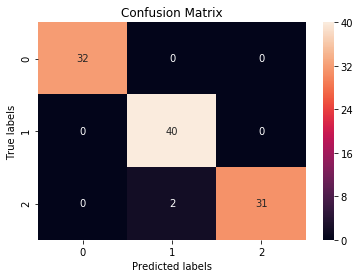

In [552]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

4. Run through steps 2-4 using entropy as your measure of impurity.

5. Which performs better on your in-sample data?
    - _Gini Impurity_ performed slighly better

6. Save the best model in tree_fit

In [553]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.93
